# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Group EDA
Week 8 | Day 3

## Congratulations! 🎉

You have just completed your final weekly project!

We're going to be moving into time series and big data in the weeks to follow, but for the rest of 
the week, we're going take a break and consolidate the skills you have learned so far on a project of your choosing...

## Today we will be splitting into 4 groups to perform an end-to-end analysis of a dataset
#### This analysis will take place over the next two days and culminate in a presentation tomorrow afternoon

#### Your group will be responsible for the following:

- Choosing a dataset to explore
- Defining a problem statement as a group
- Exloring your data and practicing exploratory analysis 
- Validating results
- Communicating results succinctly

## Deliverables

- 5-10 minute presentation 
- Jupyter notebook of your analysis

## Peer Feedback

After each team's presentation, the other teams will be asked to provide peer feedback
- This should include at least one thing the team did well and one thing they could have improved
- Please focus on both the analysis and the presentation style

You will also be prompted to provide feedback on other team member's on a Google form

## Suggestions

- Appoint someone to present / organize
- Look at summary statistics, explore data
- Refine problem statement
- Divide and conquer your workload
- Don't fight - you will be held accountable for presenting _something_.
- You will present

## The Datasets

#### You many use any dataset you like, here are a few places to get you started:
- https://github.com/caesar0301/awesome-public-datasets
- https://github.com/fivethirtyeight/data

### You have one hour to choose a dataset, if you fail to choose one, you will randomly be assigned one


## Good luck!

Checking to see if we had any missing values
1458
No     1063
Yes     395
Name: Handheld, dtype: int64
1458
PS3     295
X360    286
Wii     240
DS      200
PS2      82
PSP      72
3DS      67
PS4      57
PC       56
XOne     47
WiiU     30
PSV      25
GBA       1
Name: Platform, dtype: int64
Total Number of Rows: 1458


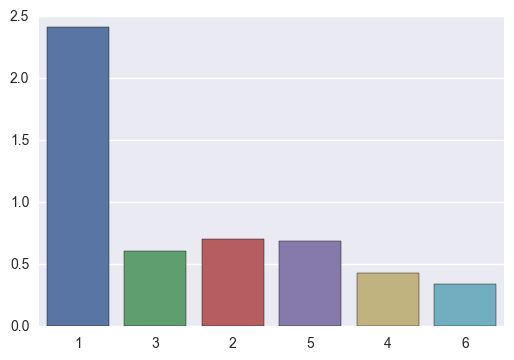

In [393]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv("vgsales.csv")
df=df[df["Year"]>2006]
df=df[df["Year"]<2016]
df=df[pd.notnull(df["Year"])]
df=df.drop_duplicates()


def handheld_bin(platform):
    dictionary={'3DS': 'Yes',
                'DC': 'No',
                'DS': 'Yes',
                'GBA': 'Yes',
                'GC': 'No',
                'PC': 'No',
                'PS2': 'No',
                'PS3': 'No',
                'PS4': 'No',
                'PSP': 'Yes',
                'PSV': 'Yes',
                'Wii': 'No',
                'WiiU': 'Yes',
                'X360': 'No',
                'XB': 'No',
                'XOne': 'No'}
    return dictionary[platform]


def platform_bin(platform):
    dictionary={'3DS': 'Nintendo',
                'DC': 'Sega',
                'DS': 'Nintendo',
                'GBA': 'Nintendo',
                'GC': 'Nintendo',
                'PC': 'PC',
                'PS2': 'Sony',
                'PS3': 'Sony',
                'PS4': 'Sony',
                'PSP': 'Sony',
                'PSV': 'Sony',
                'Wii': 'Nintendo',
                'WiiU': 'Nintendo',
                'X360': 'Microsoft',
                'XB': 'Microsoft',
                'XOne': 'Microsoft'}
    return dictionary[platform]


df["Handheld"]=df["Platform"].apply(lambda x: handheld_bin(x))
df["Console Company"]=df["Platform"].apply(lambda x: platform_bin(x))

#grouping every video game by name, genre, and year (last 10 years) and summing up all global sales
genre_l10 = df.groupby(['Name','Genre','Year'])['Global_Sales'].sum().to_frame()
genre_l10.reset_index(inplace = True)

#grouping by genre and year, we can find total global sales and number of games

df = df[(df['Year']<2016) & (df['Year']>=2005) & (df['Console Company'] != 'Sega')]
df['Platform'].value_counts()
total = genre_l10['Global_Sales']
df['tot_global_sales'] = total
df = df[(df['tot_global_sales']>=.15) & (df['Genre']!='Puzzle')]

df.reset_index(inplace=True,drop=True)



print "Checking to see if we had any missing values"
print df["Handheld"].value_counts().sum()
print df["Handheld"].value_counts()
print df["Platform"].value_counts().sum()
print df["Platform"].value_counts()
print "Total Number of Rows: "+str(len(df))

#This cell will get us a list of all released titles, and a list of information of the platforms
# they were released on and the respective global sales by system

names=df["Name"].unique()
titles_dictionary={}
indices=df["Name"].index
#titles_dictionary will assign each name in 'names' a list of lists consisting of ["Platform","Global Sales"]
for name in names:
    titles_dictionary[name]=[]
for index in indices:
    row=df.iloc[index].copy()
    temp=titles_dictionary[row["Name"]]
    temp.append([row["Platform"],row["Global_Sales"]])
    titles_dictionary[name]=temp
    
#Create a function that takes in a list of platforms and sales, and creates a dictionary with keys corresponding
# to the platform and global sales organized from best to worst in terms of sales; best global sales gets 1
# It will output a dictionary with values of lists  {1: [[PS3:1,100,000],[...]],2: [[PS2:750,000],[...]]}

def rank_systems(dictionary):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        temp.sort(key=(lambda x: x[1]))
        temp.reverse()
        for i in range(len(temp)):
            l_temp=[]
            if str(len(temp)+1) in return_dict.keys():
                l_temp=return_dict[str(i+1)]
            l_temp.append(temp[i])
            return_dict[str(i+1)]=l_temp
    return return_dict

def rank_sales(dictionary):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        temp.sort(key=(lambda x: x[1]))
        temp.reverse()
        for i in range(len(temp)):
            l_temp=[]
            if str(len(temp)+1) in return_dict.keys():
                l_temp=return_dict[str(i+1)]
            l_temp.append(temp[i][1])
            return_dict[str(i+1)]=l_temp
    return return_dict

systems_dictionary=rank_systems(titles_dictionary)
sales_dictionary=rank_sales(titles_dictionary)

keys=[key for key in sales_dictionary.keys()]
xs=[int(key) for key in keys]
ys=[np.mean(sales_dictionary[key]) for key in keys]

sns.barplot(x=xs, y=ys)
plt.xticks(range(len(xs)),keys)
plt.show()


#Goal is to see that if you did best on console 'X', what other platforms looked like
# Use dictionary again, but filter so '1' is only console X, and '1' is non-console x


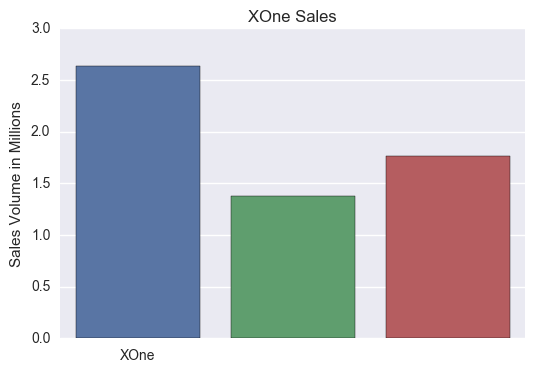

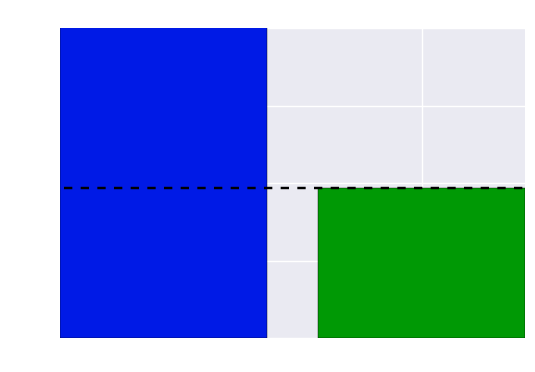

In [495]:
def rank_system_sales(dictionary,system):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        temp.sort(key=(lambda x: x[1]))
        temp.reverse()
        if temp[0][0]==system:
            for i in range(len(temp)):
                l_temp=[]
                if str(len(temp)+1) in return_dict.keys():
                    l_temp=return_dict[str(i+1)]
                l_temp.append(temp[i][1])
                return_dict[str(i+1)]=l_temp
    return return_dict

def rank_system_sales_versus(dictionary,system,competitor):
    return_dict={}
    for key in dictionary:
        temp=dictionary[key]
        if len(temp)>1:
            temp.sort(key=(lambda x: x[1]))
            temp.reverse()
            if temp[0][0]==system:
                if temp[1][0]==competitor:
                    for i in range(len(temp)):
                        l_temp=[]
                        if str(len(temp)+1) in return_dict.keys():
                            l_temp=return_dict[str(i+1)]
                        l_temp.append(temp[i][1])
                        return_dict[str(i+1)]=l_temp
    return return_dict


### Change these values to see the companies you want
primary="XOne"
competitor="X360"

system_sales_dictionary=rank_system_sales(titles_dictionary,primary)
system_sales_versus_dictionary=rank_system_sales_versus(titles_dictionary,primary,competitor)

keys=[key for key in system_sales_dictionary.keys()]
xs=[int(key) for key in keys]
ys=[np.mean(system_sales_dictionary[key]) for key in keys]

sns.barplot(x=xs, y=ys)
plt.title("%s Sales" %primary)
plt.ylabel("Sales Volume in Millions")
plt.xticks(range(1),[primary])
plt.show()

keys=[key for key in system_sales_versus_dictionary.keys()]
xs=[int(key) for key in keys]
ys=[np.mean(system_sales_versus_dictionary[key]) for key in keys]
coloring='white'
plt.bar(range(2), ys[:2],color=[(0,0.1,0.9,1.0),(0,0.6,0.02,1.0)])
plt.hlines(ys[1],0.015,1.8,linestyles='dashed')
plt.title("Same Game %s"%primary+" vs "+"%s"%competitor+" Sales" ,color=coloring)
plt.ylabel("Sales Volume in Millions",color=coloring)
plt.xticks([0.4,1.4],[primary,competitor],color=coloring)
plt.yticks(color=coloring)
plt.ylim(0,2.)
plt.show()

In [476]:
df.columns

Index([u'Rank', u'Name', u'Platform', u'Year', u'Genre', u'Publisher',
       u'NA_Sales', u'EU_Sales', u'JP_Sales', u'Other_Sales', u'Global_Sales',
       u'Handheld', u'Console Company', u'tot_global_sales'],
      dtype='object')

In [492]:
df.groupby(["Name","Platform"])["Global_Sales"].mean().reset_index().\
                groupby("Platform")["Global_Sales"].mean().reset_index()

,Platform,Global_Sales
0,3DS,1.458955
1,DS,0.967300
2,GBA,1.210000
3,PC,1.071071
4,PS2,0.737073
5,PS3,1.241695
6,PS4,1.593158
7,PSP,0.730139
8,PSV,0.589200
9,Wii,1.516833


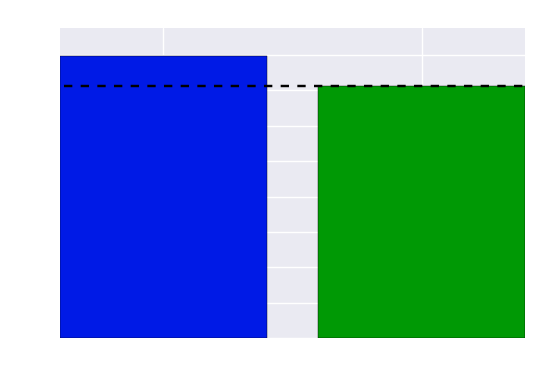

In [493]:
sales=[df[df["Platform"]=="PS4"].groupby("Platform")["Global_Sales"].mean()[0],\
       df[df["Platform"]=="XOne"].groupby("Platform")["Global_Sales"].mean()[0]]

sales=[1.593158,1.426809]

plt.bar(range(2),sales,color=[(0,0.1,0.9,1.0),(0,0.6,0.02,1.0)])
plt.hlines(sales[1],0.015,1.8,linestyles='dashed')
plt.xticks([0.4,1.4],["PS4","XBox One"],color='white')
plt.yticks(color='white')
plt.ylim(0,1.75)
plt.ylabel("Sales Volume in Millions",color='white')
plt.title("Average PS4 Sales vs Average XBox One Sales",color='white')
plt.show()

In [357]:
ys

[1.212, 0.57999999999999996, 0.55999999999999994]

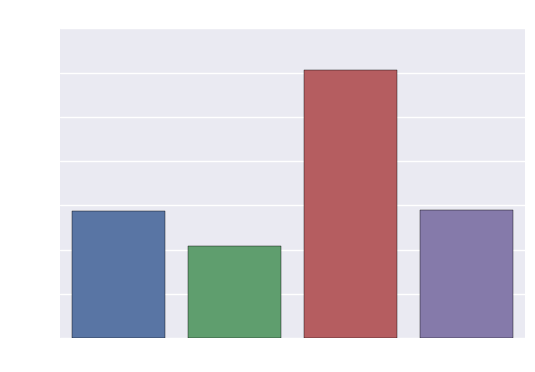

In [360]:
names=['PS4','PS3','XBox One', 'XBox 360']
values=[0.57285714285714273,0.41500000000000004,1.212, 0.57999999999999996]

sns.barplot(x=names, y=values)
plt.title("Same Game %s"%primary+" vs "+"%s"%competitor+" Sales" ,color='white')
plt.ylabel("Sales Volume in Millions",color='white')
plt.xticks(range(4),names,color='white')
plt.yticks(color='white')
plt.show()

In [344]:
df["Platform"].unique()

array(['Wii', 'X360', 'PS3', 'DS', '3DS', 'PS4', 'PC', 'XOne', 'WiiU',
       'PSP', 'PS2', 'PSV', 'GBA', 'XB', 'GC', 'DC'], dtype=object)

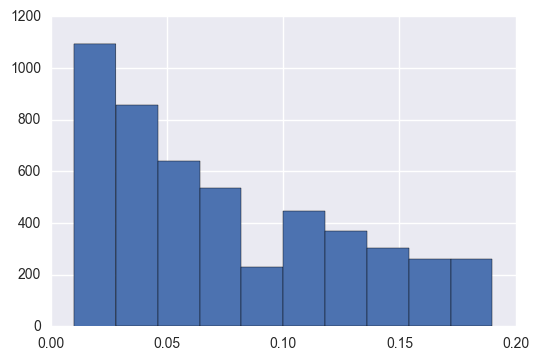

In [337]:
plt.hist(df[df["Global_Sales"]<.2]["Global_Sales"]);

In [316]:
df[df["Year"]==2013].sort_values("Global_Sales", ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Handheld
6,17,Grand Theft Auto V,Sony,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,No
7,24,Grand Theft Auto V,Microsoft,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,No
11,33,Pokemon X/Pokemon Y,Nintendo,2013.0,Role-Playing,Nintendo,5.17,4.05,4.34,0.79,14.35,Yes
31,62,Call of Duty: Ghosts,Microsoft,2013.0,Shooter,Activision,6.72,2.63,0.04,0.82,10.21,No
35,68,Call of Duty: Ghosts,Sony,2013.0,Shooter,Activision,4.09,3.73,0.38,1.38,9.59,No
38,73,Minecraft,Microsoft,2013.0,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20,No
62,113,FIFA 14,Sony,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,No
79,147,The Last of Us,Sony,2013.0,Action,Sony Computer Entertainment Europe,2.41,2.28,0.28,1.01,5.99,No
99,189,Tomodachi Life,Nintendo,2013.0,Simulation,Nintendo,0.96,2.02,1.89,0.28,5.15,Yes
124,235,Luigi's Mansion: Dark Moon,Nintendo,2013.0,Action,Nintendo,1.78,1.39,1.10,0.30,4.58,Yes


In [49]:
for col in df:
     if df[col].any()==np.NaN:
        print col

In [22]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

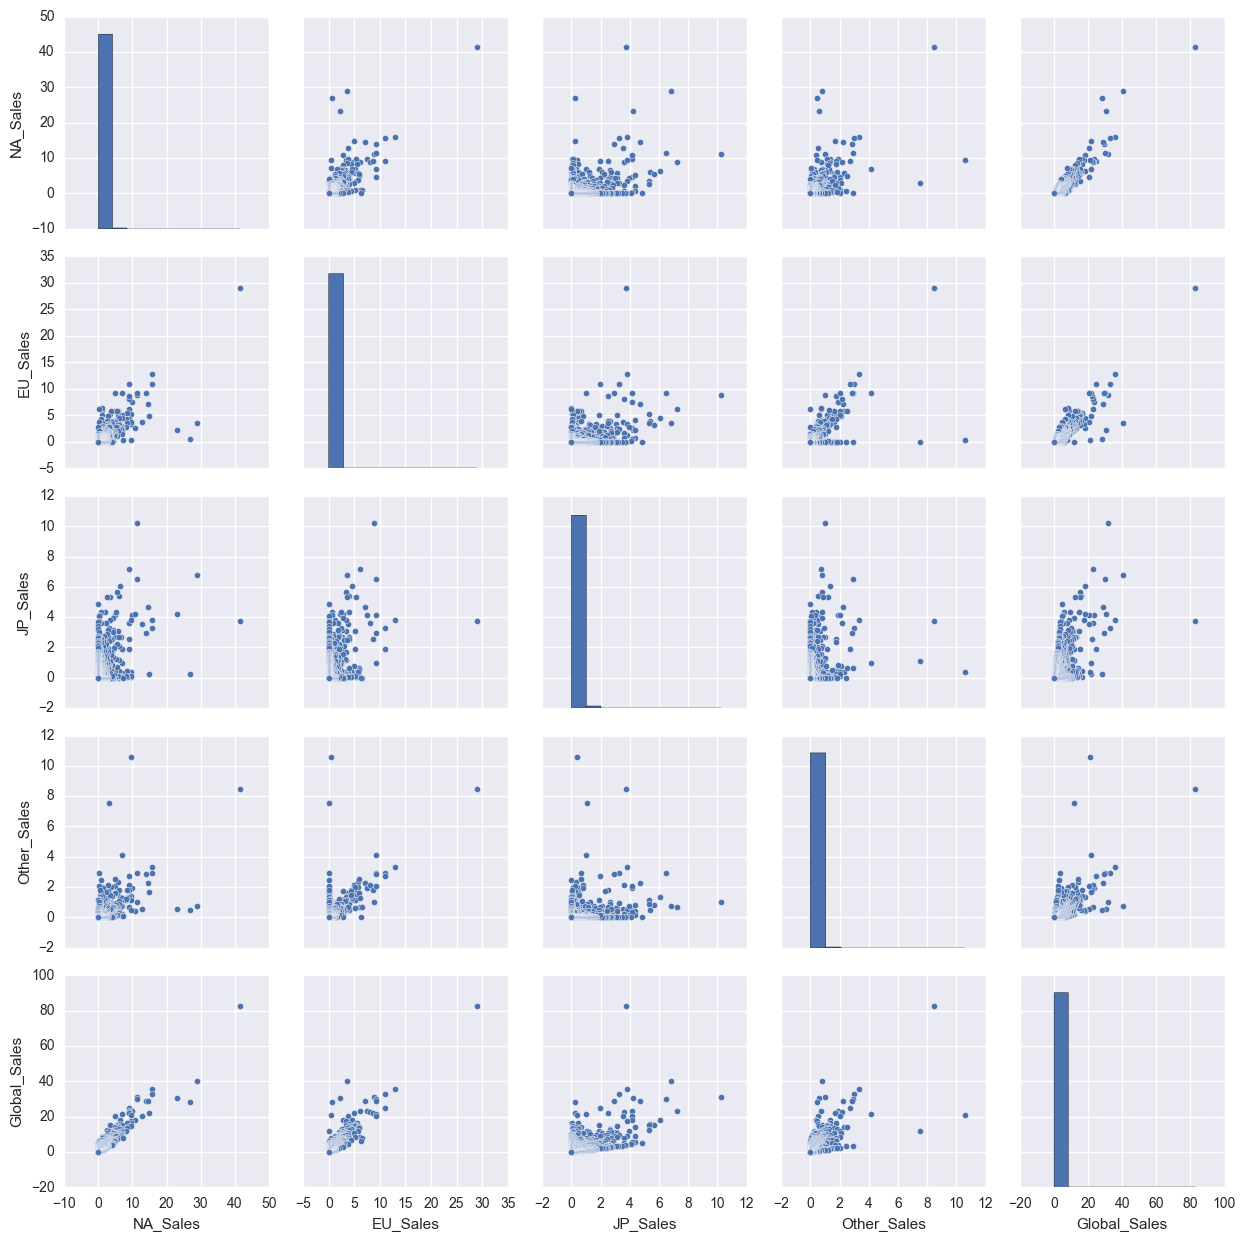

In [33]:
sns.pairplot(df[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]])
plt.show()